In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-dark-palette")
from datetime import datetime
import warnings
warnings.filterwarnings("ignore") 

### **First Dataset_Animalpolitico.com**

In [213]:
df = pd.read_excel('actas-defuncion-covid-19-cdmx.xlsx')
df.head(3)

,EDAD,FECHA,SEMANA,MES,RAZON,ACTA
0,41 AÑOS,2020-03-18,12,3,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS...",7129
1,61 AÑOS,2020-03-23,13,3,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR...",4459
2,60 AÑOS,2020-03-26,13,3,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ...",4591


In [214]:
#Verifying if there is any nan value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EDAD    4579 non-null   object        
 1   FECHA   4579 non-null   datetime64[ns]
 2   SEMANA  4579 non-null   int64         
 3   MES     4579 non-null   int64         
 4   RAZON   4579 non-null   object        
 5   ACTA    4579 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 214.8+ KB


EDAD      0
FECHA     0
SEMANA    0
MES       0
RAZON     0
ACTA      0
dtype: int64

In [0]:
#Delete time 00:00 from date
df['FECHA'] = pd.to_datetime(df['FECHA']).dt.date

In [0]:
df = df.drop(columns=['SEMANA','MES','ACTA'])

In [0]:
#Remove part of strings of Edad
df['EDAD'] = df['EDAD'].str.rstrip('DIASAÑOSMESES')

In [0]:
#Convert Edad values to int
df['EDAD'] = df['EDAD'].astype(int)

In [0]:
#Set Fecha as index
df = df.set_index('FECHA')

In [220]:
df.sample(4)

,EDAD,RAZON
FECHA,,
2020-05-06,55,"SINDROME DE DISTRES RESPIRATORIO AGUDO, ENFERM..."
2020-04-25,56,"INSUFICIENCIA RESPIRATORIA, NEUMONIA ATIPICA, ..."
2020-05-06,68,NEUMONIA POR COVID SARS COV 2
2020-04-30,72,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA ATI..."


In [0]:
#Select rows which contains word Covid 
df = df[df.RAZON.str.contains('COVID')]
#df.RAZON.to_list()

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2622 entries, 2020-03-18 to 2020-05-12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   EDAD    2622 non-null   int64 
 1   RAZON   2622 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.5+ KB


In [223]:
#Drop rows which contain deaths with no covid confimed
targets = ['PROBABLE','SOSPECHA','SOSPECHOSO','POSIBLE','PROB','PB','NO IDENTIFICADO','DESCARTADO','SOSPECHO','SOPECHOSO','PRBABLE',
          'PROPOBABLE','POBALE','SOPECOSO','PROPABLE','PROVABLE','PRIOBABLE']

#Cases where corovid-19 were confirmed      
Confirmed = df[~df.RAZON.apply(lambda sentence: any(word in sentence for word in targets))]

Confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 2020-03-18 to 2020-05-12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   EDAD    740 non-null    int64 
 1   RAZON   740 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.3+ KB


In [224]:
#Cases where corovid-19 were Not confirmed
No_Confirmed = df[df.RAZON.apply(lambda sentence: any(word in sentence for word in targets))]

No_Confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1882 entries, 2020-04-04 to 2020-05-12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   EDAD    1882 non-null   int64 
 1   RAZON   1882 non-null   object
dtypes: int64(1), object(1)
memory usage: 44.1+ KB


---

### **Second Dataset_Datosabiertos.gob**



In [225]:
df2 = pd.read_csv('200521COVID19MEXICO.csv', encoding='latin1')  #instead encoding = 'uft-8'
df2.head(3)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-21,11e989,2,3,27,2,27,27,4,2,2020-04-24,2020-04-20,2020-04-27,2,1,71,1,97,99,1,2,2,2,1,2,2,2,2,2,1,1.0,99.0,MÃ©xico,99,2.0
1,2020-05-21,1aad65,2,4,19,2,5,5,18,2,2020-03-30,2020-03-30,2020-04-03,2,2,66,1,97,2,2,2,2,2,2,1,2,2,2,2,99,1.0,99.0,MÃ©xico,99,1.0
2,2020-05-21,04f631,2,4,14,1,14,14,67,1,2020-04-10,2020-04-07,9999-99-99,97,2,35,1,2,2,2,2,2,2,2,2,2,2,2,2,99,1.0,99.0,MÃ©xico,99,97.0


In [0]:
#Drop not necessary columns
df2 = df2.drop(columns=['FECHA_ACTUALIZACION','ID_REGISTRO','ORIGEN','SECTOR','ENTIDAD_UM','ENTIDAD_NAC','TIPO_PACIENTE','FECHA_INGRESO','FECHA_SINTOMAS',
                        'INTUBADO','NEUMONIA','EMBARAZO','HABLA_LENGUA_INDIG','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM', 'NACIONALIDAD',
                        'CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','OTRO_CASO','MIGRANTE','PAIS_NACIONALIDAD','PAIS_ORIGEN','UCI'])

In [227]:
df2.info()
df2.isna().sum()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124987 entries, 0 to 124986
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEXO           124987 non-null  int64  
 1   ENTIDAD_RES    124987 non-null  int64  
 2   MUNICIPIO_RES  124987 non-null  int64  
 3   FECHA_DEF      124987 non-null  object 
 4   EDAD           124987 non-null  int64  
 5   RESULTADO      124986 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 5.7+ MB


SEXO             0
ENTIDAD_RES      0
MUNICIPIO_RES    0
FECHA_DEF        0
EDAD             0
RESULTADO        1
dtype: int64

In [0]:
df2 = df2[df2.FECHA_DEF != '9999-99-99']    #drop rows with that value

In [0]:
#Fecha_def to datetime format and delete time 00:00 from it

df2['FECHA_DEF'] = pd.to_datetime(df2['FECHA_DEF'])
df2['FECHA_DEF'] = pd.to_datetime(df2['FECHA_DEF']).dt.date

In [0]:
df2 = df2.set_index('FECHA_DEF')   #Set Fecha_def as index

In [231]:
df2.head(4)

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,EDAD,RESULTADO
FECHA_DEF,,,,,
2020-04-27,2,27,4,71,1.0
2020-04-03,2,5,18,66,1.0
2020-04-20,1,15,110,67,1.0
2020-03-22,2,9,13,78,1.0


In [0]:
 #Select rows which values Entidad == 9, since 09 indicates deaths of cdmx
df2 = df2[df2.ENTIDAD_RES ==9]

In [0]:
#Give names to values, since 1 and 2 represent Mujer, Hombre respectively
df2.SEXO = df2['SEXO'].map({1:'Mujer',2:'Hombre'})

In [0]:
#Change numbers to their respective Municipio name.
df2.MUNICIPIO_RES = df2['MUNICIPIO_RES'].map({2:'AZCAPOTZALCO',3:'COYOACÁN',4:'CUAJIMALPA DE MORELOS',5:'GUSTAVO A. MADERO',6:'IZTACALCO',7:'IZTAPALAPA',
                                              8:'LA MAGDALENA CONTRERAS',9:'MILPA ALTA',10:'ÁLVARO OBREGÓN',11:'TLÁHUAC',12:'TLALPAN',13:'XOCHIMILCO',
                                              14:'BENITO JUÁREZ',15:'CUAUHTÉMOC',16:'MIGUEL HIDALGO',17:'VENUSTIANO CARRANZA'})

In [235]:
df2.sample(3)

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,EDAD,RESULTADO
FECHA_DEF,,,,,
2020-05-16,Hombre,9,ÁLVARO OBREGÓN,77,1.0
2020-04-28,Hombre,9,AZCAPOTZALCO,58,1.0
2020-04-30,Hombre,9,IZTAPALAPA,44,1.0


In [236]:
df2.groupby(['RESULTADO']).size()

RESULTADO
1.0    1461
2.0     209
dtype: int64

In [0]:
#Select values where Resultado == 1, since 1 indicates Covid positive.
Positive = df2[df2.RESULTADO == 1.0]

In [0]:
#Cases where Covid were not positive after analysis.
No_Positive = df2[df2.RESULTADO == 2.0]

---

### ***Comparison of two datasets***

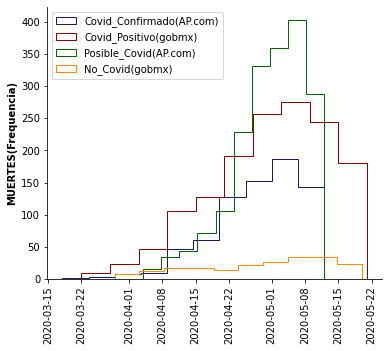

In [239]:
#Histogram

fig, ax = plt.subplots(figsize=(6,5))
(pd.Series(Confirmed.index)).hist(label="Covid_Confirmado(AP.com)",histtype="step",color='midnightblue')
(pd.Series(Positive.index)).hist(label="Covid_Positivo(gobmx)",histtype="step",color='darkred')
(pd.Series(No_Confirmed.index)).hist(label="Posible_Covid(AP.com)",histtype="step",color='darkgreen')
(pd.Series(No_Positive.index)).hist(label="No_Covid(gobmx)",histtype="step",color='darkorange')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.ylabel('MUERTES(Frequencia)',fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(b=False)

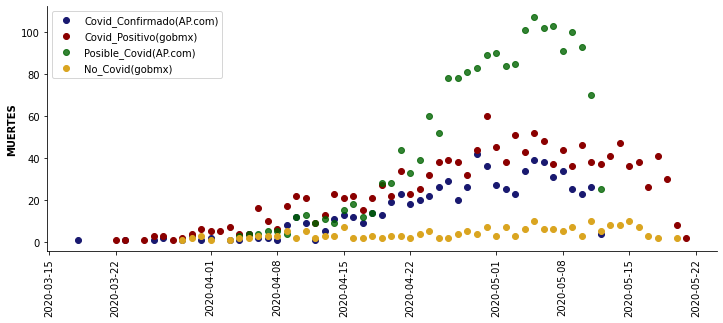

In [240]:
#Scatter_plot
fig, ax = plt.subplots(figsize=(12,4.5))
plt.plot(Confirmed.groupby(Confirmed.index).size(),'o', label="Covid_Confirmado(AP.com)",color='midnightblue')
plt.plot(Positive.groupby(Positive.index).size(),'o', label="Covid_Positivo(gobmx)", color='darkred')
plt.plot(No_Confirmed.groupby(No_Confirmed.index).size(),'o', label="Posible_Covid(AP.com)", color='darkgreen',alpha=0.8)
plt.plot(No_Positive.groupby(No_Positive.index).size(),'o', label="No_Covid(gobmx)", color='goldenrod')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.ylabel('MUERTES',fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

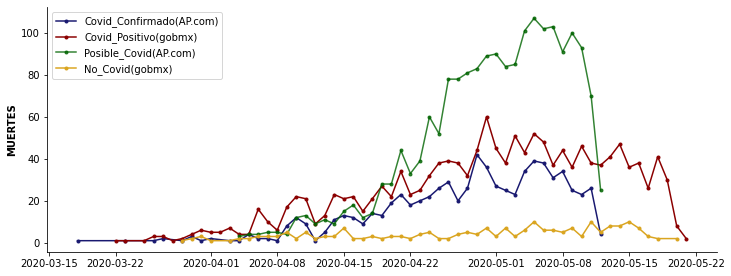

In [241]:
#Timeseries

fig, ax = plt.subplots(figsize=(12,4.5))
ax.plot(Confirmed.groupby(Confirmed.index).size(), marker='.', label="Covid_Confirmado(AP.com)",color='midnightblue')
ax.plot(Positive.groupby(Positive.index).size(),color='darkred', marker='.',label="Covid_Positivo(gobmx)")
ax.plot(No_Confirmed.groupby(No_Confirmed.index).size(), marker='.', label="Posible_Covid(AP.com)",color='darkgreen',alpha=0.8)
ax.plot(No_Positive.groupby(No_Positive.index).size(),color='goldenrod', marker='.',label="No_Covid(gobmx)")
ax.set_ylabel('MUERTES',fontweight='bold')
ax.legend(loc='upper left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


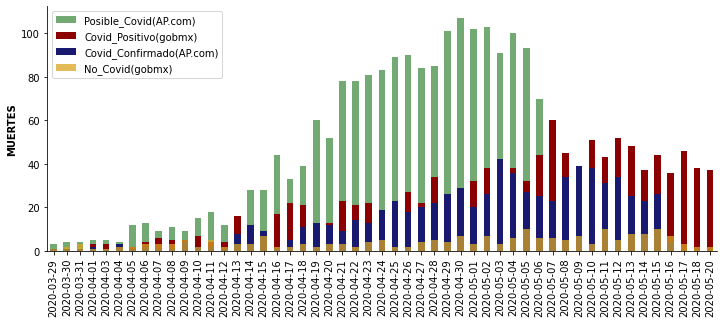

In [242]:
#Bar_plot

fig, ax = plt.subplots(figsize=(12,4.5))
No_Confirmed.groupby(No_Confirmed.index).size().plot(kind="bar", alpha=0.55,color='darkgreen',label="Posible_Covid(AP.com)")
Positive.groupby(Positive.index).size().plot(kind="bar",color='darkred',label="Covid_Positivo(gobmx)")
Confirmed.groupby(Confirmed.index).size().plot(kind="bar",color='midnightblue',label="Covid_Confirmado(AP.com)")
No_Positive.groupby(No_Positive.index).size().plot(kind="bar",color='goldenrod',alpha=0.75,label="No_Covid(gobmx)")
plt.ylabel('MUERTES',fontweight='bold')
plt.xlabel('')
ax.legend(loc='upper left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


***Plus_Data***

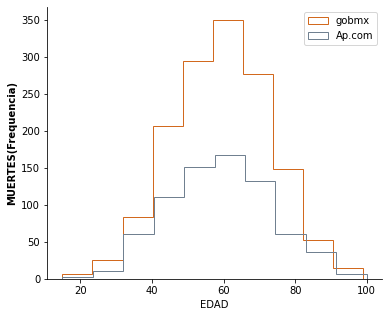

In [243]:
#Histogram indicates more frequent Edad of people which died for covid
#According to bot dataset, deaths for covid were between 55-65 years aprox.
fig,ax = plt.subplots(figsize=(6,5))
Positive.EDAD.hist(histtype='step',color='chocolate',label="gobmx")
Confirmed.EDAD.hist(histtype='step',color='slategray',label="Ap.com")
plt.xlabel('EDAD')
plt.ylabel('MUERTES(Frequencia)',fontweight='bold')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(b=False)


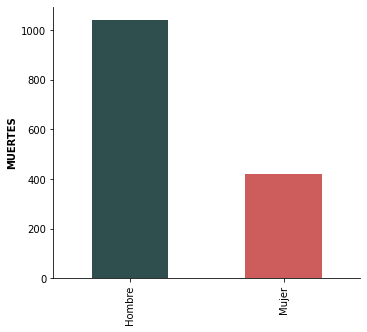

In [244]:
#According to second dataset (Positive cases), most of dead people for Covid were men (Hombres)

fig, ax = plt.subplots(figsize=(5.5,5))
Positive.groupby(['SEXO']).size().plot(kind='bar',color=('darkslategray','indianred'))
ax.set_xlabel('')
ax.set_ylabel('MUERTES',fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

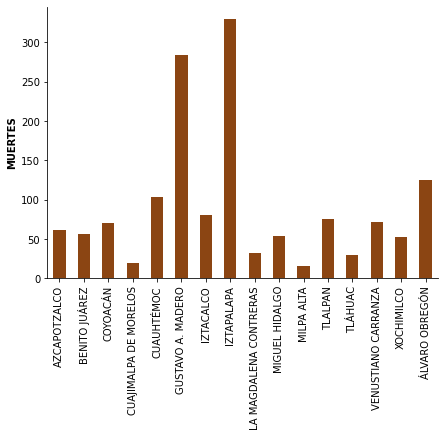

In [245]:
#According to second dataset (Positive cases), these are the Municipios in CDMX where dead people lived. 

fig,ax= plt.subplots(figsize=(7,5))
Positive.groupby(['MUNICIPIO_RES']).size().plot(kind="bar", color='saddlebrown')
ax.set_xlabel('')
ax.set_ylabel('MUERTES',fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

  **Databases:**                                                       
- https://www.animalpolitico.com/2020/05actas-defuncion-muertes-covid-cdmx/                                    
- https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

